# Restaurant - Recommender System
## Popularity , KNN, User Based

Dataset of Restaurants and their Ratings. Using Popularity Based, KNN Based and User Based Recommender System for a dataset of Books.

For more information about the dataset use the following Kaggle link:
https://www.kaggle.com/datasets/uciml/restaurant-data-with-consumer-ratings?select=rating_final.csv

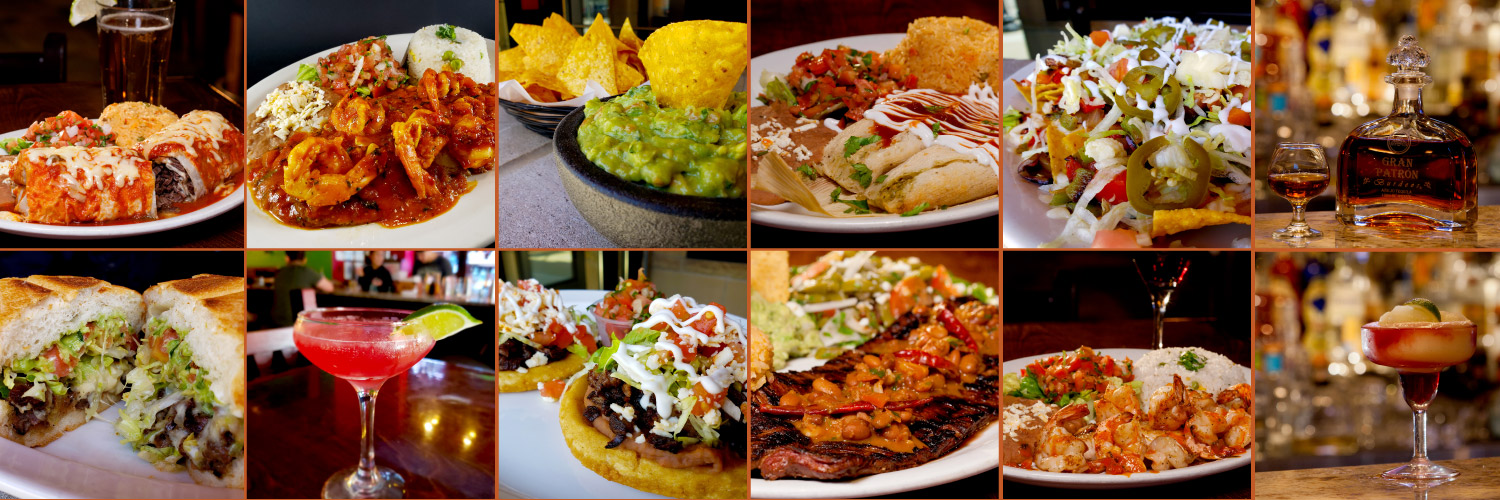

# Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/restaurant-data-with-consumer-ratings/chefmozcuisine.csv
/kaggle/input/restaurant-data-with-consumer-ratings/chefmozhours4.csv
/kaggle/input/restaurant-data-with-consumer-ratings/rating_final.csv
/kaggle/input/restaurant-data-with-consumer-ratings/userprofile.csv
/kaggle/input/restaurant-data-with-consumer-ratings/README
/kaggle/input/restaurant-data-with-consumer-ratings/chefmozaccepts.csv
/kaggle/input/restaurant-data-with-consumer-ratings/chefmozparking.csv
/kaggle/input/restaurant-data-with-consumer-ratings/geoplaces2.csv
/kaggle/input/restaurant-data-with-consumer-ratings/usercuisine.csv
/kaggle/input/restaurant-data-with-consumer-ratings/userpayment.csv


In [2]:
# load and prepare data
df1=pd.read_csv("/kaggle/input/restaurant-data-with-consumer-ratings/geoplaces2.csv")
df2=pd.read_csv("/kaggle/input/restaurant-data-with-consumer-ratings/rating_final.csv")
ratings=pd.merge(df1,df2) # merge two df's
ratings=ratings[['placeID','name','userID','rating']] # take needed columns
ratings['userID'] = ratings['userID'].str[1:] # remove the 'U' from the user ID's
ratings.dropna(inplace=True) # Remove rows with missing values
ratings.head() # show new dataframe

,placeID,name,userID,rating
0,134999,Kiku Cuernavaca,1093,2
1,134999,Kiku Cuernavaca,1066,1
2,134999,Kiku Cuernavaca,1040,1
3,134999,Kiku Cuernavaca,1110,2
4,134999,Kiku Cuernavaca,1121,2


# EDA - Exploratory Data Analysis

In [3]:
ratings.info() # infos about samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   placeID  1161 non-null   int64 
 1   name     1161 non-null   object
 2   userID   1161 non-null   object
 3   rating   1161 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.4+ KB


We have 1161 sample, and 4 features. Let's check how many restaurants we have.

In [4]:
ratings.name.nunique() # unique number of restaurants

129

We have a total of 129 Restaurants in our dataset.

## Data Visualization

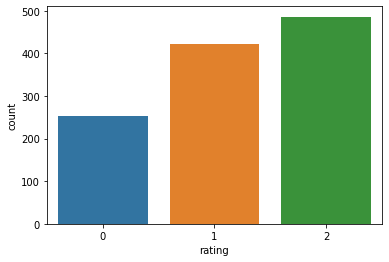

In [5]:
sns.countplot(x=ratings.rating); # plot the ratings

Most of our ratings are 2, followed by 1 and least is 0.

The following heatmap shows the correlation between the number of ratings and average rating for each place, with warmer colors indicating a stronger correlation.

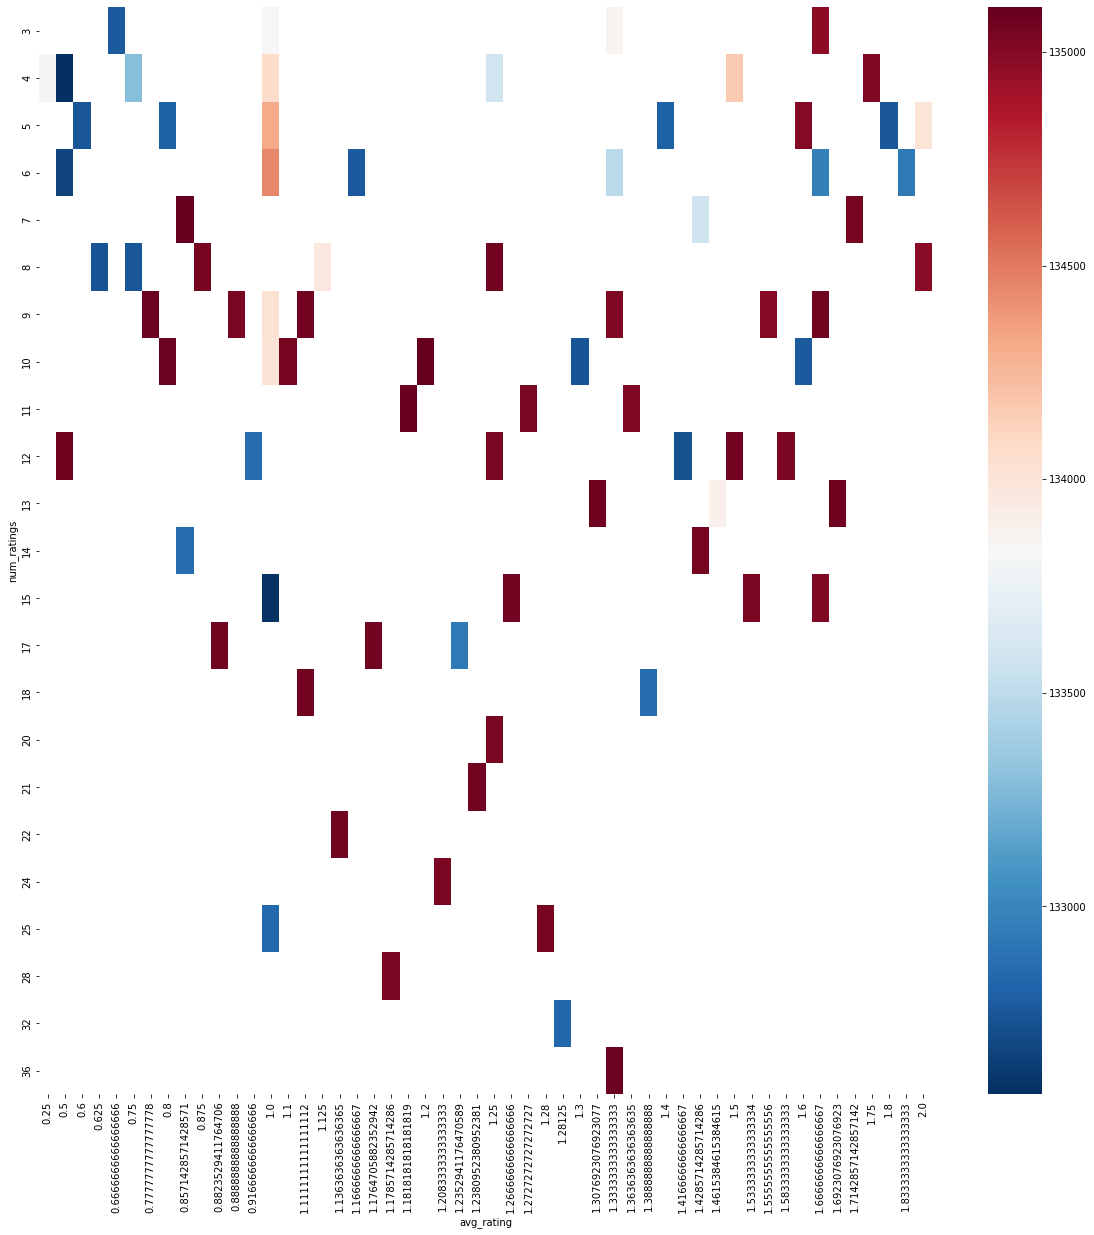

In [27]:
# Group the data by item ID and calculate the number of ratings and average rating for each item
item_ratings = ratings.groupby('placeID').agg({'rating': ['count', 'mean']}).reset_index()
# Rename the columns
item_ratings.columns = ['placeID', 'num_ratings', 'avg_rating']
# Create a pivot table showing the correlation between the number of ratings and average rating for each book
pivot = pd.pivot_table(item_ratings, index='num_ratings', columns='avg_rating', values='placeID')
# Create a heatmap of the pivot table
plt.figure(figsize=(20,20))
sns.heatmap(pivot, cmap='RdBu_r');

# Popularity Based Recommender System
Recommending the most populer Restaurant:
First we seperate our restaurants to groups and see how many users gave the place a rating. We also calculate the total number and mean value of the ratings. Then we calculate the percentage weight and show all these in a Dataframe, showing the most popular Restaurant on top.

In [6]:
# function to calculate popularity stats
def popularity_based_rec(df, group_col, rating_col):
    # group by title and get size, sum and mean values
    grouped = df.groupby(group_col).agg({rating_col: [np.size, np.sum, np.mean]})
    # most popular mean value on top
    popular = grouped.sort_values((rating_col, "mean"), ascending=False)
    total_sum = grouped[rating_col]["sum"].sum() # needed for sum by percentage
    # percentage weight
    popular["percentage"] = popular[rating_col]["sum"].div(total_sum) * 100
    return popular.sort_values(("percentage"), ascending=False)

## Show top 5 Restaurants

In [7]:
# call function and show top 5 restaurants
popularity_stats = popularity_based_rec(ratings, "name", "rating")
popularity_stats.head() # show top 5 restaurants

rating               percentage
                                     size sum      mean           
name                                                              
Tortas Locas Hipocampo                 36  48  1.333333   3.445800
puesto de tacos                        32  41  1.281250   2.943288
Cafeteria y Restaurant El Pacifico     28  33  1.178571   2.368988
La Cantina Restaurante                 25  32  1.280000   2.297200
Restaurant la Chalita                  24  29  1.208333   2.081838

If we have no information about the users, we should recommend **Tortas Locas Hipocampo**. If they don't like it or already visited this place, than recommend **puesto de tacos**.

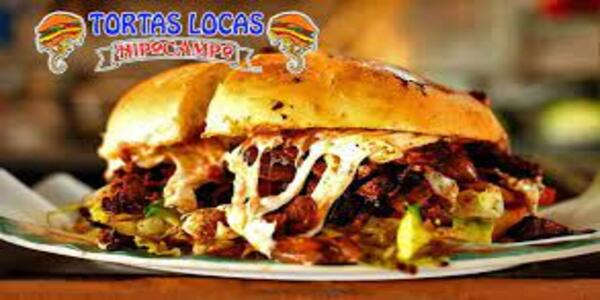 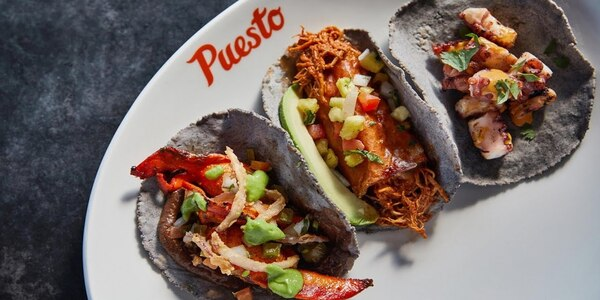

# K-Nearest Neighbor Based Recommender System
A k-nearest neighbor (KNN) based recommender system is a type of collaborative filtering system that uses the ratings given by users to other items to make recommendations. The system works by calculating the similarity between each pair of items, and then using the similarities to predict how a user will rate a given item.

In [8]:
# sort the restaurants from largest to smallest according to its mean ratings
itemProperties = ratings.groupby("placeID").agg({"rating": [np.size, np.mean]})
itemProperties.head()

rating      
          size  mean
placeID             
132560       4  0.50
132561       4  0.75
132564       4  1.25
132572      15  1.00
132583       4  1.00

In [9]:
# calculate their percentages
itemNumRatings = pd.DataFrame(itemProperties["rating"]["size"])
itemNormalizedNumRatings = itemNumRatings.apply(lambda x: (x-np.min(x)) / (np.max(x) - np.min(x)))
itemNormalizedNumRatings.tail() # show last 5 entries

,size
placeID,
135088,0.090909
135104,0.121212
135106,0.212121
135108,0.242424
135109,0.030303


In [10]:
#ratings.to_csv("/kaggle/working/ratings.csv")

In [11]:
df=pd.read_csv('/kaggle/working/ratings.csv')
df.head()

,Unnamed: 0,placeID,name,userID,rating
0,0,134999,Kiku Cuernavaca,1093,2
1,1,134999,Kiku Cuernavaca,1066,1
2,2,134999,Kiku Cuernavaca,1040,1
3,3,134999,Kiku Cuernavaca,1110,2
4,4,134999,Kiku Cuernavaca,1121,2


First we create a dictionary of items. Then we find the distance of n item from another item and get the K-Nearest Neighbors and show them in a list.

In [12]:
# store all restaurants in a dictionary with their id's, names ratings, number of ratings and average ratings
itemDict = {} # create an empty item Dictionary
# Read in the ratings data from the CSV file
with open('/kaggle/working/ratings.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)  # skip the first row
    for row in csv_reader:
        if row[1] == '' or row[2] == '' or row[3] == '' or row[4] == '':
            continue
        # get the right columns
        itemID = int(row[1])
        name = row[2]
        userID = int(row[3])
        rating = int(row[4])

        if itemID not in itemDict:
            itemDict[itemID] = {'name': name, 'ratings': [], 'numRatings': 0, 'totalRating': 0}
        itemDict[itemID]['ratings'].append(rating)
        itemDict[itemID]['numRatings'] += 1
        itemDict[itemID]['totalRating'] += rating

# Calculate the average rating for each item
for itemID in itemDict:
    item = itemDict[itemID]
    name = item['name']
    ratings = item['ratings']
    numRatings = item['numRatings']
    totalRating = item['totalRating']
    avgRating = totalRating / numRatings
    itemDict[itemID] = {'name': name, 'ratings': ratings, 'numRatings': numRatings, 'avgRating': avgRating}

Let's have a look at our Item Dictionary and how the data is stored.

In [15]:
itemDict

{134999: {'name': 'Kiku Cuernavaca',
  'ratings': [2, 1, 1, 2, 2],
  'numRatings': 5,
  'avgRating': 1.6},
 132825: {'name': 'puesto de tacos',
  'ratings': [2,
   2,
   1,
   1,
   2,
   2,
   1,
   2,
   1,
   2,
   2,
   2,
   0,
   1,
   2,
   1,
   0,
   0,
   2,
   2,
   1,
   2,
   0,
   1,
   2,
   0,
   1,
   1,
   0,
   2,
   1,
   2],
  'numRatings': 32,
  'avgRating': 1.28125},
 135106: {'name': 'El Rinc�n de San Francisco',
  'ratings': [2, 2, 1, 2, 0, 2, 0, 0, 2, 1],
  'numRatings': 10,
  'avgRating': 1.2},
 132667: {'name': 'little pizza Emilio Portes Gil',
  'ratings': [1, 1, 1, 2],
  'numRatings': 4,
  'avgRating': 1.25},
 132613: {'name': 'carnitas_mata',
  'ratings': [2, 1, 0, 1, 2, 1],
  'numRatings': 6,
  'avgRating': 1.1666666666666667},
 135040: {'name': 'Restaurant los Compadres',
  'ratings': [0, 0, 0, 1],
  'numRatings': 4,
  'avgRating': 0.25},
 132732: {'name': 'Taqueria EL amigo ',
  'ratings': [0, 1, 0, 0, 1, 0, 2, 1],
  'numRatings': 8,
  'avgRating': 0.6

In [13]:
# function that finds the distance of an item from another item
def ComputeDistance(a, b):
    # Find the common ratings for both item
    common_ratings = [rating for rating in a['ratings'] if rating in b['ratings']]

    # If there are no common ratings, the distance is infinity
    if len(common_ratings) == 0:
        return float('inf')

    # If the lists of ratings are not the same length, return infinity
    if len(a['ratings']) != len(b['ratings']):
        return float('inf')

    # Calculate the sum of the squared differences between the ratings
    sum_squared_differences = sum([(a['ratings'][i] - b['ratings'][i]) ** 2 for i in range(len(common_ratings))])

    # Return the square root of the sum of squared differences, which is the distance between the two items
    return sum_squared_differences ** 0.5

In [14]:
# function to get K-Nearest Neighbors
def getNeighbors(itemID, K):
    # Get the item object for the given item ID
    target_item = itemDict[itemID]

    # Create a list of tuples (distance, itemID) for all items in the dictionary
    distances = [(ComputeDistance(target_item, itemDict[itemID]), itemID) for itemID in itemDict if itemDict[itemID]['name'] != target_item['name']]

    # Sort the list of tuples by distance (ascending)
    distances.sort()

    # Return the K nearest neighbors (item with the lowest distances)
    return distances[:K]

In [26]:
# get the smallest distances as a list
neighbors = getNeighbors(134999, 30)
# Print the item names and distances of the nearest neighbors
for distance, itemID in neighbors:
    print(f"{itemDict[itemID]['name']}: {distance:.2f}")

el lechon potosino : 1.00
Chaires: 1.00
Pollo_Frito_Buenos_Aires: 1.41
Hamburguesas saul: 1.41
emilianos: 1.41
Michiko Restaurant Japones: 1.41
La Estrella de Dimas: 1.73
tacos de barbacoa enfrente del Tec: 2.00
Cenaduria El Rincón de Tlaquepaque: 2.00
Restaurant and Bar and Clothesline Carlos N Charlies: 2.24
Restaurante de Mariscos la Langosta: 2.24
Hamburguesas Valle Dorado: 2.45
carnitas mata calle Emilio Portes Gil: 2.65
Tortas y hamburguesas el gordo: 2.65
el pueblito: 2.65
TACOS CORRECAMINOS: 3.16
puesto de gorditas: inf
cafe ambar: inf
churchs: inf
Cafe Chaires: inf
McDonalds Centro: inf
Gorditas Dona Tota: inf
Hamburguesas La perica: inf
carnitas_mata: inf
la perica hamburguesa: inf
palomo tec: inf
Carnitas Mata  Calle 16 de Septiembre: inf
tacos abi: inf
little pizza Emilio Portes Gil: inf
TACOS EL GUERO: inf


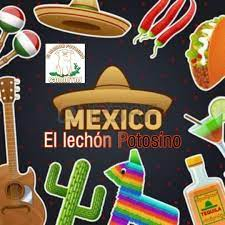

# User Based Recommender System

User Based recommendations Systems are based on the preferences of similar users. It works by identifying users who have similar tastes and recommending items that they have liked.

## Matrix Factorization

Matrix factorization is a technique that is commonly used in recommendation systems to predict the ratings that users will give to items. These matrices can then be used to make predictions about how a user will rate an item by taking the dot product of the user and item vectors.


In [17]:
ratings=pd.read_csv("/kaggle/working/ratings.csv")

In [18]:
# Matrix Factorization (pivot_table)
itemratings=ratings.pivot_table(index=['userID'],columns=["name"],values="rating")
itemratings.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# an example of the correaltion between 'Cafe Chaires' and 'la parroquia'
item=itemratings['Cafe Chaires']
itemratings[["Cafe Chaires","la parroquia"]].corr()

name,Cafe Chaires,la parroquia
name,,
Cafe Chaires,1.000000,0.912871
la parroquia,0.912871,1.000000


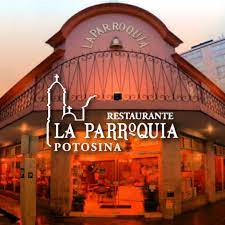

In [20]:
# show items with most correlation
itemratings.corrwith(item).sort_values(ascending=False).to_frame('corr').dropna()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corr
name,
Cafe Chaires,1.000000
La Cantina Restaurante,1.000000
Restaurante Marisco Sam,1.000000
Restaurante El Cielo Potosino,1.000000
la parroquia,0.912871
VIPS,0.870388
Restaurante Casa de las Flores,0.866025
La Posada del Virrey,0.866025
Restaurante Bar Fu-hao,0.852803


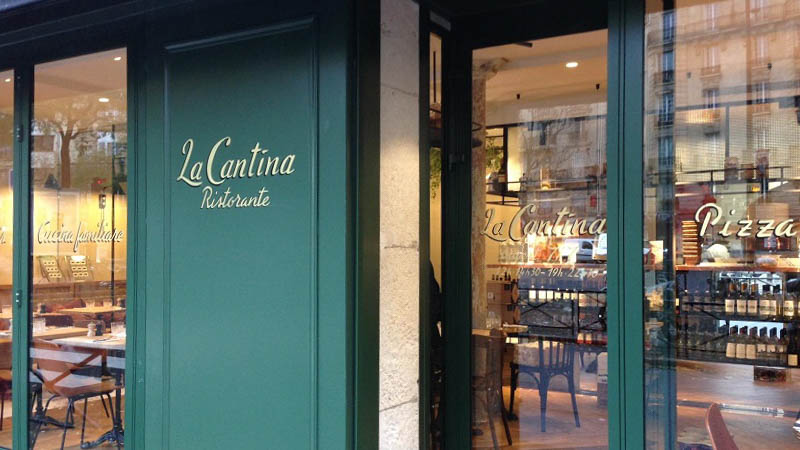

In [21]:
# show item with least correlation
itemratings.corrwith(item).sort_values(ascending=True).to_frame('corr').dropna()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corr
name,
shi ro ie,-1.000000
Sushi Itto,-1.000000
Gordas de morales,-0.577350
Tortas Locas Hipocampo,-0.428571
los Toneles,-0.090909
puesto de tacos,0.000000
Mariscos El Pescador,0.078811
El angel Restaurante,0.301511
Restaurante El Reyecito,0.306786


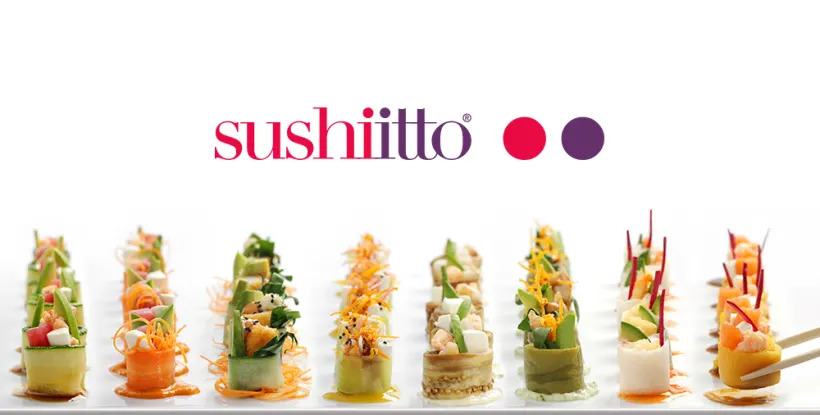

In [22]:
# show a sample of random 15 items and see their correlation
itemratings.corrwith(item).to_frame('corr').dropna().sample(15).dropna()

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,corr
name,
la Cantina,0.763763
la parroquia,0.912871
Sushi Itto,-1.000000
Restaurante El Cielo Potosino,1.000000
La Posada del Virrey,0.866025
La Virreina,0.500000
Mariscos El Pescador,0.078811
Mcdonalds Parque Tangamanga,0.645497
Gorditas Doa Gloria,0.500000


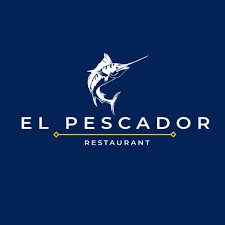